In [7]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-eonnngul because the default path (/home/developer/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


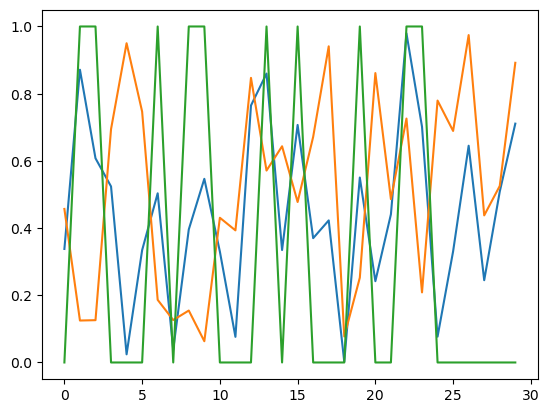

In [34]:
#Faremos dados aleatórios
import random
label = 0
coord = []
n = 30
nodes = [[random.uniform(1,0), random.uniform(1,0), label] for _ in range(n)]
for node in nodes:
    if(node[0] > node[1]):
        node[2] = 1
    else:
        node[2] = 0
plt.plot(nodes)

In [35]:
#Faremos a função de ativação degrau binário
from abc import ABC, abstractmethod
class activationFunction:
  @abstractmethod
  def activation(self, x):
    pass
  @abstractmethod
  def derivate(self, x):
    pass

class stepFunction(activationFunction):
    def __init__(self):
        pass
    def activation(self, x):
        if x >= 0:
            return 1
        else:
            return 0
    def derivate(self, x):
        # A derivada da função degrau é 0 em quase todo lugar
        # (tecnicamente, é indefinida em x=0, mas para fins práticos é 0)
        return np.zeros_like(x)

class sigmoidFunction(activationFunction):
    def __init__(self):
        pass
    def activation(self, x):
        values = 1 / (1 + np.exp(-x))
        return values
    def derivate(self, x):
         return self.activation(x) * (1 - self.activation(x))

class perceptron:
    def __init__(self, weights_size):
        self.weights = np.random.normal(0,0.1, size= weights_size)
        self.bias = np.random.normal(0,0.1, 1)
        self.predictions = 0
        self.loss_weight_matrix = []
        self.weighted_sums = []

    # O Guess recebe os nós inputados e, para cada um deles, com seu peso escolhido (por enquanto)
    # aleatóriamente, nos dá um chute de se o nó correspodne a um +1 ou -1
    def guess(self, nodes, af):
        self.weighted_sums = np.dot(nodes, self.weights) + self.bias
        self.predictions = af.activation(self.weighted_sums)
        return self.predictions

    def calc_loss(self, predictions, targets):
      # A perda é baseada nas predições já feitas
        total_error = np.sum((targets - predictions)**2)
        return total_error / len(targets)

    def train(self, training_data, af, learning_rate, epochs):

        # Separar entradas (X) e alvos (y)
        inputs = np.array([node[0:2] for node in training_data])
        targets = np.array([node[2] for node in training_data])

        N = len(inputs)

        loss_history = []

        for epoch in range(epochs):
          #1: Forward Pass (predições)
          predictions = self.guess(inputs, af)

          loss = self.calc_loss(predictions, targets)
          loss_history.append(loss)

          #----------------------Calculando gradiente do Bias------------------------- 
          bias_gradient_sum = 0
          for i in range(N):
            #Gradiente do bias => delta * 1
              bias_gradient_sum += -1*2*(targets[i] - predictions[i]) * af.derivate(self.weighted_sums[i])*1

          #queremos pegar a média desses gradientes e colocar na fórmula de atualização (wi = wi - (learning_rate * media dos gradientes))
          self.bias = self.bias - (learning_rate * (bias_gradient_sum/N))

          #----------------------Calculando gradiente do Peso------------------------- 

          for j in range(len(inputs[0])):
            weights_gradient_sum = 0
            for i in range(N):
              #A parte da equação que se diferencia do Gradiente do Bias é o *inputs[i][j] afinal:
              # Gradiente de um peso j => delta * input_j
              weights_gradient_sum += -1*2*(targets[i] - predictions[i]) * af.derivate(self.weighted_sums[i])*inputs[i][j]
            self.weights[j] = self.weights[j] - (learning_rate * (weights_gradient_sum/N))
          if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
        return loss_history

Epoch 0, Loss: 0.2399114450225681
Epoch 1000, Loss: 0.10077600184335128
Epoch 2000, Loss: 0.06685688813836181
Epoch 3000, Loss: 0.051035773301830754
Epoch 4000, Loss: 0.041698829412865575
Epoch 5000, Loss: 0.03546179577366503
Epoch 6000, Loss: 0.030963080186576213
Epoch 7000, Loss: 0.027544663302604497
Epoch 8000, Loss: 0.024847689612308918
Epoch 9000, Loss: 0.022658780850899056
Epoch 10000, Loss: 0.020842535360470694


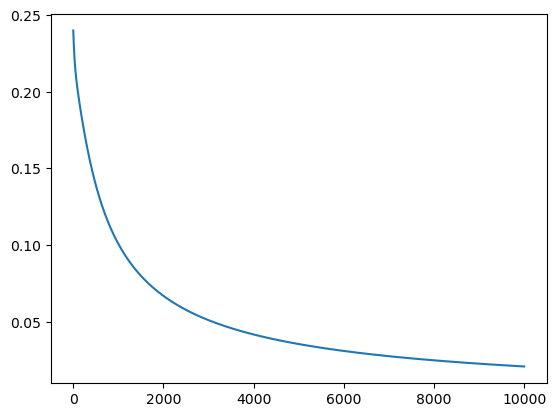

In [36]:
p = perceptron(2)
loss_history = p.train(nodes, sigmoidFunction(), 0.1, 10001)
plt.plot(loss_history)

--- Iniciando o Treinamento (Porta Lógica OR) ---

Epoch 0, Loss: 0.2954498963261488


Epoch 1000, Loss: 0.14222658152074166
Epoch 2000, Loss: 0.12094052892256757
Epoch 3000, Loss: 0.11029506821377738
Epoch 4000, Loss: 0.1031202015529478
Epoch 5000, Loss: 0.09750064227400984
Epoch 6000, Loss: 0.09272700881975537
Epoch 7000, Loss: 0.08848466190311272
Epoch 8000, Loss: 0.08461681569445245
Epoch 9000, Loss: 0.08103820117879279
Epoch 10000, Loss: 0.0776986892175777
Epoch 11000, Loss: 0.07456640704921869
Epoch 12000, Loss: 0.07161938179237541
Epoch 13000, Loss: 0.06884122301517681
Epoch 14000, Loss: 0.06621882556908366
Epoch 15000, Loss: 0.06374112087833061
Epoch 16000, Loss: 0.06139838609887556
Epoch 17000, Loss: 0.05918185515990587
Epoch 18000, Loss: 0.057083494995214194
Epoch 19000, Loss: 0.05509587278970532
Epoch 20000, Loss: 0.05321207355229819
Epoch 21000, Loss: 0.051425645551400556
Epoch 22000, Loss: 0.04973056118435305
Epoch 23000, Loss: 0.048121186422375756
Epoch 24000, Loss: 0.046592255078142665
Epoch 25000, Loss: 0.04513884587543999
Epoch 26000, Loss: 0.04375636126

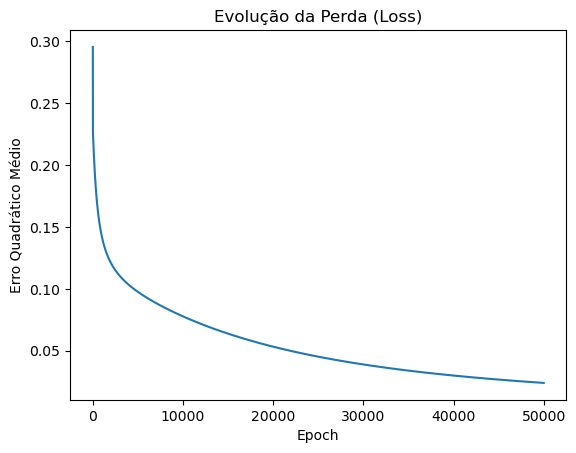

In [37]:
### ========================
###   SCRIPT DE EXECUÇÃO 
### ========================

# --- 1. Dados de Treinamento (Porta Lógica OR) ---
# [input 1, input 2, target]

# [x1, x2, y] onde y=1 se x1+x2 > 8, senão y=0
new_training_data = [
    # ---- Classe 0 (x1 + x2 <= 8) ----
    [1, 1, 0],
    [2, 3, 0],
    [4, 4, 0],
    [5, 3, 0], # Seu dado
    [8, 0, 0],
    [-1, 5, 0],
    [4, 1, 0], # Seu dado
    [7, 1, 0],
    
    # ---- Classe 1 (x1 + x2 > 8) ----
    [5, 4, 1],
    [6, 3, 1],
    [1, 8, 1], # Seu dado
    [9, 0, 1],
    [4, 5, 1],
    [2, 7, 1],
    [10, -1, 1],
    [56, 90, 1] # Seu dado
]

print("--- Iniciando o Treinamento (Porta Lógica OR) ---\n")

# --- 2. Instanciar e Treinar ---
sigmoid = sigmoidFunction()       # Vamos usar Sigmoid
p = perceptron(weights_size=2)    # 2 inputs (peso w1 e w2)

# Hiperparâmetros
learning_rate = 0.1
epochs = 50000

# Chamar o treinamento!
loss_history = p.train(new_training_data, sigmoid, learning_rate, epochs)

# --- 3. Testar o Perceptron Treinado ---
print("\n--- Testando o Perceptron Treinado ---")

# Vamos criar os inputs de teste
test_inputs= [
    [1, 2, 0], # Teste Classe 0
    [4, 3, 0], # Teste Classe 0
    [5, 5, 1], # Teste Classe 1
    [7, 2, 1]  # Teste Classe 1
]

# Fazer predições nos inputs de teste
all_predictions = p.guess(np.array(test_inputs)[:,0:2], sigmoid)

esperados = (np.array(test_inputs))[:,2]
print("\nResultados Finais:")
for i in range(len(test_inputs)):
    target = esperados[i]
    prediction = all_predictions[i]
    
    # A predição será um float (ex: 0.05 ou 0.95). 
    # Vamos arredondar para ver o resultado binário.
    binary_result = np.round(prediction) 
    
    print(f"Input: {test_inputs[i]} | Esperado: {target} | Predição: {prediction:.4f} (-> {binary_result})")

# --- 4. (Opcional) Plotar a Perda ---
plt.plot(loss_history)
plt.title("Evolução da Perda (Loss)")
plt.xlabel("Epoch")
plt.ylabel("Erro Quadrático Médio")
plt.show()

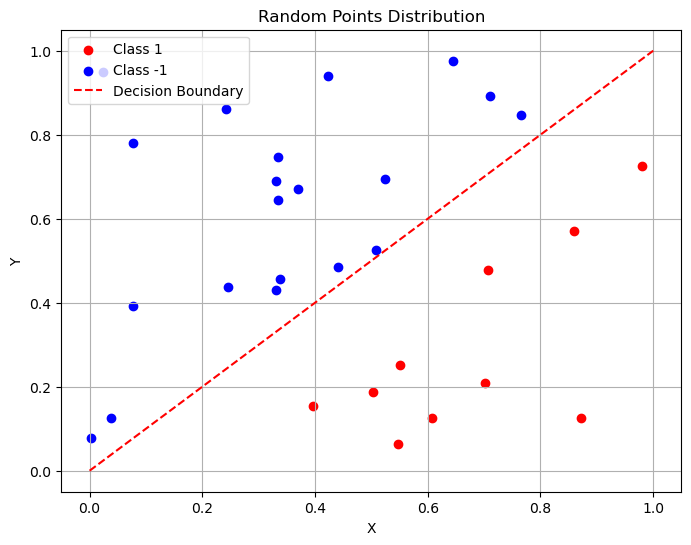

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Convert nodes to numpy array for easier manipulation
nodes_array = np.array(nodes)

# Split points based on label (nodes_array[:, 2] gets all labels)
red_points = nodes_array[nodes_array[:, 2] == 1]
blue_points = nodes_array[nodes_array[:, 2] == 0]

# Create plot
plt.figure(figsize=(8, 6))
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=1, label='Class 1')
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=1, label='Class -1')

# Add 45-degree line
plt.plot([0, 1], [0, 1], 'r--', label='Decision Boundary')

# Customize plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points Distribution')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
nodes_array = np.array(nodes)
#O número que inicializa o perceptron fala sobre a função que essa vai ter (ex: perceptron(2) = função linear -> (y=w0*x+w1))
p = perceptron(2)

In [341]:
prediction = p.guess([7,3])
print(prediction)
print(p.weights)
print(p.calc_loss(nodes_array))

-1
[-0.59893783 -1.44778952]
1.7333333333333334


In [79]:
def func(x,b0,b1):
    return b0*x + b1

def loss(nodes, func, b0, b1):
    total_error = 0
    for node in nodes:
        actual = node[1]
        predicted = func(node[0], b0, b1)
        total_error = total_error + (actual - predicted)**2
    return total_error / len(nodes)

In [80]:
# Test the loss function with sample data
test_nodes = [
    [0, 1, 1],  # x, y, label
    [1, 2, 1],
    [2, 3, -1]
]

# Test with different parameters
print("Test 1:", loss(test_nodes, func, b0=1, b1=0))  # Linear function y = x
print("Test 2:", loss(test_nodes, func, b0=2, b1=0))  # Linear function y = 2x
print("Test 3:", loss(test_nodes, func, b0=1, b1=1))  # Linear function y = x + 1

Test 1: 1.0
Test 2: 0.6666666666666666
Test 3: 0.0
